In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA PREPARATION**

## Data Preprocessing Function

In [2]:
df=pd.read_csv("fraud_oracle.csv")

In [3]:
def preprocess(df_funcion): 

    # Drop unused columns
    columns_to_drop = ['Age','Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 
                       'WeekOfMonthClaimed','PolicyNumber', 'Days_Policy_Accident', 
                       'Days_Policy_Claim','NumberOfSuppliments', 'Year', 'BasePolicy']
    df_funcion.drop(columns=columns_to_drop, inplace=True)

    # Perform REPLACE procedures  
    replacements = {
      'AccidentArea': {'Rural': 0, 'Urban': 1},
      'Sex': {'Male': 0, 'Female': 1},
      'Fault': {'Third Party': 0, 'Policy Holder': 1},
      'VehiclePrice': {'less than 20000': 10000, '20000 to 29000': 24500, '30000 to 39000': 34500,
                       '40000 to 59000': 49500, '60000 to 69000': 64500, 'more than 69000': 85000},
      'PastNumberOfClaims': {'none': 0, '1': 1, '2 to 4': 3, 'more than 4': 5},
      'AgeOfVehicle': {'new': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,
                       '6 years': 6, '7 years': 7, 'more than 7': 8},
      'PoliceReportFiled': {'No': 0, 'Yes': 1},
      'WitnessPresent': {'No': 0, 'Yes': 1},
      'AgentType': {'External': 0, 'Internal': 1},
      'AddressChange_Claim': {'no change': 0, 'under 6 months':0.5, '1 year': 1, '2 to 3 years': 2.5,
                              '4 to 8 years': 6},
      'NumberOfCars': {'1 vehicle': 1, '2 vehicles': 2, '3 to 4': 3.5, '5 to 8': 6.5, 'more than 8': 9},
      'AgeOfPolicyHolder' : {'16 to 17': 16.5, '18 to 20': 19, '21 to 25': 23, '26 to 30': 28,
                             '31 to 35': 33, '36 to 40': 38, '41 to 50': 45.5, '51 to 65': 58,
                             'over 65': 73}
    }

    df_funcion.replace(replacements, inplace=True)

    return df_funcion # Return the processed dataframe 

In [5]:
df7=df.copy()

In [6]:
df7=preprocess(df7)

## Feature Engineering

In [8]:
#NEW COLUMNS: Combination of Numerical Features


df7['DiscountPolicyVehicle'] = df7['Deductible'] / df7['VehiclePrice']
df7['ClaimsPerYear'] = df7['PastNumberOfClaims'] / df7['AgeOfPolicyHolder']
df7['DriverRatingMinusClaims'] = df7['DriverRating'] - df7['PastNumberOfClaims']
df7['ClaimsAgeOfVehicleInteraction'] = df7['PastNumberOfClaims'] * df7['AgeOfVehicle']


In [9]:
#NEW COLUMNS: Combination of Categorical Features

df7['Make_VehicleCategory'] = df7['Make'].astype(str) + '_' + df7['VehicleCategory'].astype(str)
df7['Make_PolicyType'] = df7['Make'].astype(str) + '_' + df7['PolicyType'].astype(str)
df7['AgeOfVehicle_Make'] = df7['AgeOfVehicle'].astype(str) + '_' + df7['Make'].astype(str)
df7['Age_Make'] = df7['AgeOfPolicyHolder'].astype(str) + '_' + df7['Make'].astype(str)
df7['Age_VehicleCategory'] = df7['AgeOfPolicyHolder'].astype(str) + '_' + df7['VehicleCategory'].astype(str)
df7['Make_VehiclePrice'] = df7['Make'].astype(str) + '_' + df7['VehiclePrice'].astype(str)

## OneHotEncoder

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
df7.select_dtypes(include='object').columns

Index(['Make', 'MonthClaimed', 'MaritalStatus', 'PolicyType',
       'VehicleCategory', 'Make_VehicleCategory', 'Make_PolicyType',
       'AgeOfVehicle_Make', 'Age_Make', 'Age_VehicleCategory',
       'Make_VehiclePrice'],
      dtype='object')

In [13]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(df7[['Make', 'MonthClaimed', 'MaritalStatus', 'PolicyType',
       'VehicleCategory', 'Make_VehicleCategory', 'Make_PolicyType',
       'AgeOfVehicle_Make', 'Age_Make', 'Age_VehicleCategory',
       'Make_VehiclePrice']]) 

encoder.transform(df7[['Make', 'MonthClaimed', 'MaritalStatus', 'PolicyType',
       'VehicleCategory', 'Make_VehicleCategory', 'Make_PolicyType',
       'AgeOfVehicle_Make', 'Age_Make', 'Age_VehicleCategory',
       'Make_VehiclePrice']])

nombre_columnas = encoder.get_feature_names_out(['Make', 'MonthClaimed', 'MaritalStatus', 'PolicyType',
       'VehicleCategory', 'Make_VehicleCategory', 'Make_PolicyType',
       'AgeOfVehicle_Make', 'Age_Make', 'Age_VehicleCategory',
       'Make_VehiclePrice'])

df7[nombre_columnas]= encoder.transform(df7[['Make', 'MonthClaimed', 'MaritalStatus', 'PolicyType',
       'VehicleCategory', 'Make_VehicleCategory', 'Make_PolicyType',
       'AgeOfVehicle_Make', 'Age_Make', 'Age_VehicleCategory',
       'Make_VehiclePrice']])

In [15]:
# Drop old columns   
df7.drop(['Make', 'MonthClaimed', 'MaritalStatus', 'PolicyType',
       'VehicleCategory', 'Make_VehicleCategory', 'Make_PolicyType',
       'AgeOfVehicle_Make', 'Age_Make', 'Age_VehicleCategory',
       'Make_VehiclePrice'], axis=1, inplace=True)

## Final DataFrame 

In [17]:
dftop=df7[[
       'PolicyType_Sedan - Collision',
       'PolicyType_Sport - All Perils', 
       'PolicyType_Sport - Liability', 'PolicyType_Utility - All Perils',
       'PolicyType_Utility - Collision', 'PolicyType_Utility - Liability',
       'MonthClaimed_Apr', 'MonthClaimed_Aug', 'MonthClaimed_Dec',
       'MonthClaimed_Feb', 'MonthClaimed_Jan', 'MonthClaimed_Jul',
       'MonthClaimed_Jun', 'MonthClaimed_Mar', 'MonthClaimed_May',
       'MonthClaimed_Nov', 'MonthClaimed_Oct', 'MonthClaimed_Sep',
       'VehiclePrice', 'Sex','Deductible', 'AgeOfPolicyHolder',
    
           'PolicyType_Sedan - Liability',
       'VehicleCategory_Sport', 'Fault', 'Age_VehicleCategory_33.0_Sport',
       'Age_VehicleCategory_33.0_Sedan',
       'Make_VehicleCategory_Pontiac_Sport',
       'Make_PolicyType_Pontiac_Sedan - Liability',
       'Age_VehicleCategory_38.0_Sport',
       'Make_PolicyType_Honda_Sedan - Liability',
       'Make_PolicyType_Honda_Sport - Collision',
       'Make_VehiclePrice_Accura_85000',
       'Make_PolicyType_Mazda_Sedan - Liability', 'PastNumberOfClaims',
       'Make_PolicyType_Accura_Utility - All Perils',
       'Make_VehicleCategory_Accura_Utility',
       'ClaimsAgeOfVehicleInteraction',
       'Make_VehicleCategory_Mazda_Sport', 'ClaimsPerYear',
       'DriverRatingMinusClaims', 'PolicyType_Sport - Collision','FraudFound_P']]

## MinMaxScaler

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
# Scale variables
dftop[['AgeOfPolicyHolder', 'VehiclePrice','Deductible']]= scaler.fit_transform(dftop[['AgeOfPolicyHolder', 'VehiclePrice','Deductible']])

print(dftop[['AgeOfPolicyHolder', 'VehiclePrice', 'Deductible']].head())

# **MODELING**

## After Model Selection (Pycaret) and GridSearchCV

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, recall_score, f1_score)
from imblearn.over_sampling import SMOTE

In [23]:
X = dftop.drop('FraudFound_P',axis=1)
y = dftop['FraudFound_P']

# Division Between Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Apply SMOTE to the Training Set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the Model with Balanced Training Data
model = GradientBoostingClassifier(n_estimators=700, learning_rate=0.01, max_depth=4, min_samples_split=10, min_samples_leaf=5)
model.fit(X_resampled, y_resampled)

# Predictions
y_train_pred = model.predict(X_resampled)# Predictions on the Balanced Training Set
y_test_proba = model.predict_proba(X_test)[:, 1] # Probability Predictions on the Test Set

# Apply a 0.2 Threshold to the Test Set
threshold = 0.2
y_test_pred = (y_test_proba >= threshold).astype(int)

# Calculate the Metrics
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
    
train_auc = roc_auc_score(y_resampled, model.predict_proba(X_resampled)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
train_precision = precision_score(y_resampled, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
    
train_recall = recall_score(y_resampled, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_resampled, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)


# Create a DataFrame with the Results
metrics = {
    'Metric': ['Accuracy', 'AUC-ROC', 'Precision', 'Recall', 'F1 Score'],
    'Train': [train_accuracy, train_auc, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_auc, test_precision, test_recall, test_f1]
}

metrics_df = pd.DataFrame(metrics)

# Print DataFrame
metrics_df


,Metric,Train,Test
0,Accuracy,0.986652,0.968872
1,AUC-ROC,0.999421,0.993874
2,Precision,0.988709,0.668258
3,Recall,0.984549,0.982456
4,F1 Score,0.986624,0.795455


# **MODEL EVALUATION**

## CURVA ROC

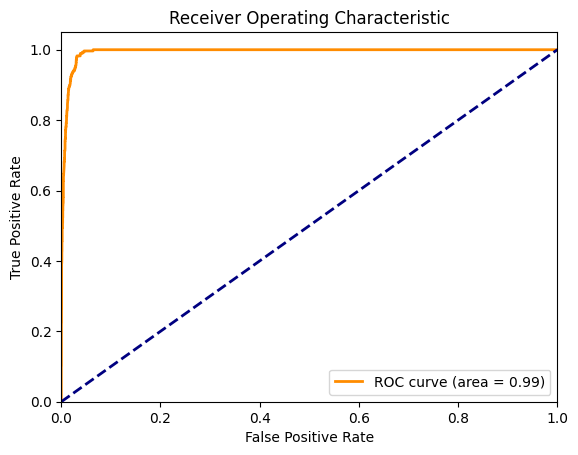

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## TOP FEATURES

In [26]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
feature_importance = result.importances_mean
features = X_test.columns

importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

importance_df = importance_df[importance_df['importance'] > 0]

importance_df

,feature,importance
40,DriverRatingMinusClaims,0.034479
18,VehiclePrice,0.029183
24,Fault,0.028556
37,ClaimsAgeOfVehicleInteraction,0.026632
0,PolicyType_Sedan - Collision,0.024816
21,AgeOfPolicyHolder,0.023714
39,ClaimsPerYear,0.016494
22,PolicyType_Sedan - Liability,0.014246
19,Sex,0.010355
20,Deductible,0.009944


In [27]:
top_15_importance_df = importance_df.head(15)

In [30]:
rename_dict = {
    'Sex': 'Gender',
    'Deductible': 'Insurance Deductible',
    'AgeOfPolicyHolder': 'Policy Holder Age',
    'PolicyType': 'Type of Policy',
    'VehicleCategory': 'Category of Vehicle',
    'Make': 'Vehicle Make',
    'VehiclePrice': 'Price of Vehicle',
    'Fault': 'Fault',
    'PastNumberOfClaims': 'Past Claims',
    'ClaimsAgeOfVehicleInteraction': 'Claims - Vehicle Age',
    'ClaimsPerYear': 'Claims per Year',
    'DriverRatingMinusClaims': 'Driver Rating - Claims',
    'PolicyType_Sedan - Collision': 'Sedan - Collision',
    'PolicyType_Sedan - Liability': 'Sedan - Liability',
    'MonthClaimed_Jan': 'Month Claimed - Jan',
    'MonthClaimed_Jul': 'Month Claimed - Jul', 
    'MonthClaimed_Mar': 'Month Claimed - Mar',
    'MonthClaimed_Apr': 'Month Claimed - Apr', 
    'MonthClaimed_Nov': 'Month Claimed - Nov'
    
}

top_15_importance_df['feature'] = top_15_importance_df['feature'].map(rename_dict).fillna(top_15_importance_df['feature'])

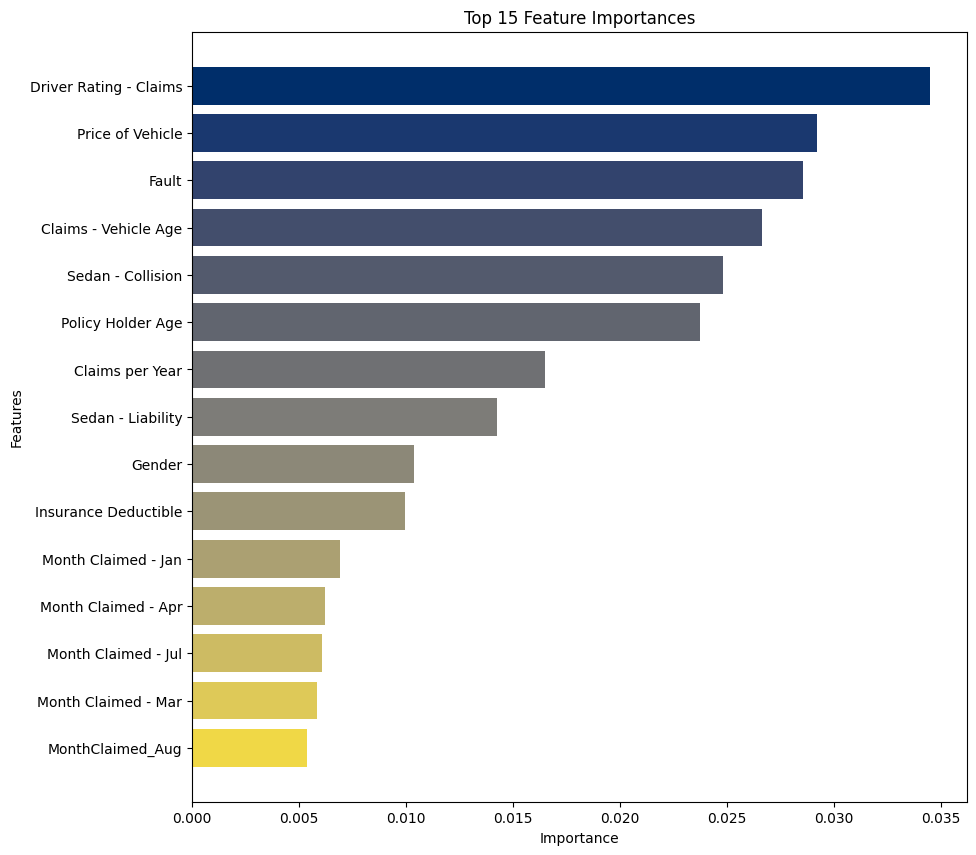

In [31]:
# Bar Chart of the Most Important Variables

palette = sns.color_palette("cividis", len(top_15_importance_df)) 
plt.figure(figsize=(10, 10))
plt.barh(top_15_importance_df['feature'], top_15_importance_df['importance'], align='center', color=palette)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()  
plt.grid(False)
plt.show()

## Confusion Matrix

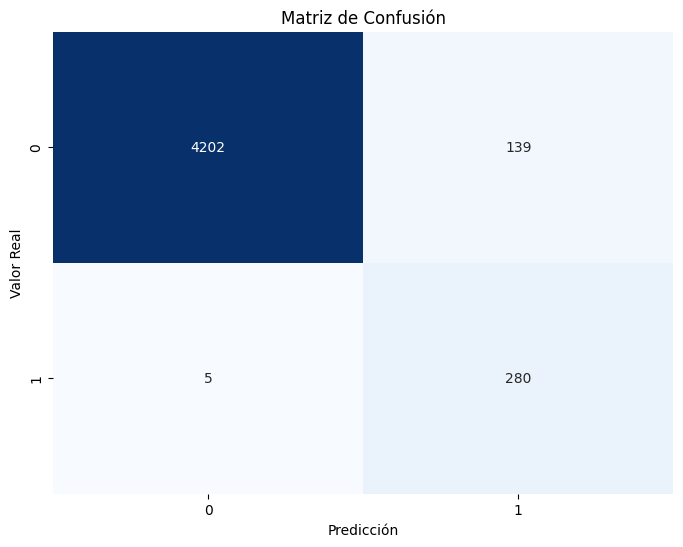

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

- **True Negatives (TN)**: With 4,202 cases correctly classified as non-fraudulent, the model performs well in identifying legitimate claims.
- **False Positives (FP)**: There are 139 cases incorrectly classified as fraudulent. This indicates a significant number of false positives where the model wrongly predicts fraud.
- **False Negatives** (FN): Only 5 cases were incorrectly classified as non-fraudulent. The model effectively detects most fraudulent claims.
- **True Positives (TP)**: The model correctly identified 280 fraud cases, showing good performance in detecting fraud.